In [2]:
from numbers import Number
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import onix.models.hyperfine as hyperfine
from IPython.display import display

%matplotlib ipympl

In [32]:
B_field = 200e-4 * 4e2
print(f"B field is set to {B_field / 1e-4:.1f} G")

ground = hyperfine.states["7F0"]
ground._Hamiltonian = ground.H_total(B_field)
excited = hyperfine.states["5D0"]
excited._Hamiltonian = excited.H_total(B_field)

B field is set to 80000.0 G


## Zeeman splittings

[89.86791767 49.31496554 48.2114274  67.54041603 12.76691708]


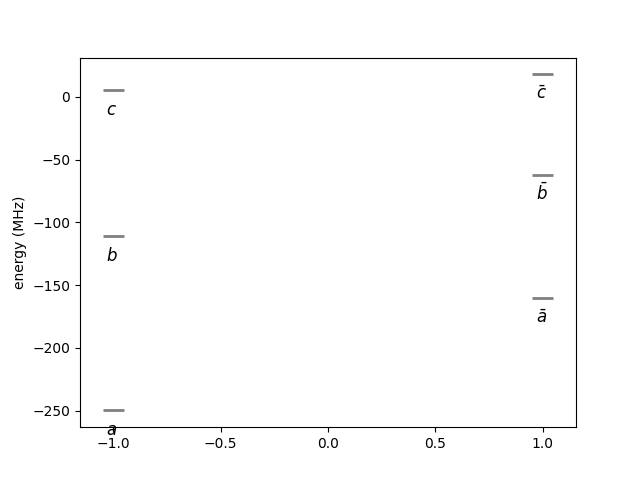

In [33]:
energies_g, states_g = ground.energies_and_eigenstates()
print(np.diff(energies_g))
fig, ax = plt.subplots()
ax.set_ylabel("energy (MHz)")

for kk, label in enumerate(hyperfine.state_labels["7F0"]):
    if "'" in label:
        xval = 1
    else:
        xval = -1
    ax.errorbar(
        xval, energies_g[kk],
        color="gray", fmt='.', markersize=0,
        xerr=0.05, capsize=0, elinewidth=2,
    )
    if "'" in label:
        state_text = "$\\bar{" + label[0] + "}$"
    else:
        state_text = f"${label[0]}$"
    ax.annotate(
        state_text,
        xy=(xval, energies_g[kk]), xycoords="data", xytext=(-5, -18),
        textcoords="offset points", color="k", size=12,
    )
    